In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm as tqdm

%matplotlib inline

import torch
import torchvision

import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import random

from torch.utils.data import Dataset, DataLoader

In [2]:
transform = transforms.Compose(
    [transforms.CenterCrop((28,28)),transforms.ToTensor(),transforms.Normalize([0.5], [0.5])])

In [3]:
mnist_trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

In [4]:
corr = int(len(mnist_trainset.targets)*0.5)

In [5]:
values = np.random.choice(np.arange(0,10,1),size= corr) 
# print(sum(values ==0),sum(values==1))
index = np.random.randint(0,50000,size = corr)


In [6]:
mnist_trainset.targets[index]

tensor([1, 5, 2,  ..., 8, 9, 7])

In [7]:
mnist_trainset.targets[index] = torch.Tensor(values).type(torch.LongTensor)


In [8]:
mnist_trainset.targets[index]

tensor([3, 4, 6,  ..., 6, 7, 4])

In [9]:
trainloader = torch.utils.data.DataLoader(mnist_trainset, batch_size=256,shuffle=False, num_workers=2)

In [10]:
testloader = torch.utils.data.DataLoader(mnist_testset, batch_size=256,shuffle=False, num_workers=2)

In [11]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

In [12]:
images[:4].shape

torch.Size([4, 1, 28, 28])

In [13]:

classes = ('zero', 'one','two','three','four','five','six','seven','eight','nine')

In [14]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

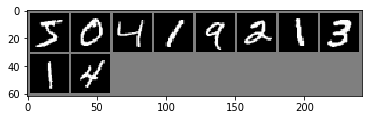

GroundTruth:   five  zero  four   one   two   two   six eight   one  four


In [15]:
imshow(torchvision.utils.make_grid(images[:10]))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(10)))

In [16]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1 = nn.Conv2d(1,64,3)
        self.conv2 = nn.Conv2d(64,128,3)
        
        self.linear1 = nn.Linear(128*24*24,256)
        self.linear2 = nn.Linear(256,10)
    def forward(self,x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = x.view(-1,128*24*24)
        x = F.relu(self.linear1(x))
        x = self.linear2(x)
        return x
        

In [17]:
net = Net()
net = net.to("cuda")

In [18]:
optimizer  = optim.SGD(net.parameters(),lr =0.01, momentum=0.9)
criterion = nn.CrossEntropyLoss()

In [19]:
loss_curi = []
for epoch in range(50): # loop over the dataset multiple times
    ep_lossi = []

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to("cuda"),labels.to("cuda")

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 50 == 49:    # print every 50 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 50))
            ep_lossi.append(running_loss/50) # loss per minibatch
            running_loss = 0.0
            
    loss_curi.append(np.mean(ep_lossi))   #loss per epoch
#     if (epoch%5 == 0):
#         _,actis= inc(inputs)
#         acti.append(actis)
    
            

print('Finished Training')

[1,    50] loss: 1.994
[1,   100] loss: 1.791
[1,   150] loss: 1.723
[1,   200] loss: 1.579
[2,    50] loss: 1.821
[2,   100] loss: 1.674
[2,   150] loss: 1.649
[2,   200] loss: 1.532
[3,    50] loss: 2.126
[3,   100] loss: 1.653
[3,   150] loss: 1.626
[3,   200] loss: 1.512
[4,    50] loss: 2.071
[4,   100] loss: 1.636
[4,   150] loss: 1.610
[4,   200] loss: 1.496
[5,    50] loss: 2.011
[5,   100] loss: 1.618
[5,   150] loss: 1.596
[5,   200] loss: 1.482
[6,    50] loss: 1.968
[6,   100] loss: 1.608
[6,   150] loss: 1.584
[6,   200] loss: 1.468
[7,    50] loss: 1.944
[7,   100] loss: 1.594
[7,   150] loss: 1.570
[7,   200] loss: 1.454
[8,    50] loss: 1.895
[8,   100] loss: 1.579
[8,   150] loss: 1.555
[8,   200] loss: 1.439
[9,    50] loss: 1.864
[9,   100] loss: 1.566
[9,   150] loss: 1.539
[9,   200] loss: 1.422
[10,    50] loss: 1.838
[10,   100] loss: 1.552
[10,   150] loss: 1.520
[10,   200] loss: 1.403
[11,    50] loss: 1.797
[11,   100] loss: 1.532
[11,   150] loss: 1.498
[11,

In [20]:
correct = 0
total = 0
out = []
pred = []
with torch.no_grad():
    for data in trainloader:
        images, labels = data
        images, labels = images.to("cuda"), labels.to("cuda")
        out.append(labels.cpu().numpy())
        outputs = net(images)
        
        _, predicted = torch.max(outputs.data, 1)
        pred.append(predicted.cpu().numpy())
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the train images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the train images: 99 %


In [22]:
correct ,total

(59753, 60000)

In [24]:
out = np.concatenate(out,axis=0)
pred = np.concatenate(pred,axis=0)

In [27]:
sum(out[~index]==pred[~index])/30000

0.995

In [28]:
sum(out[index]==pred[index])/30000

0.9890666666666666